In [72]:
import pandas as pd
data = pd.read_table('/Users/linlin/Desktop/2023/121/hw4/problem1.tsv',names=['x','y'])

In [71]:
data.head()

,x,y
0,0.072435,0.004788
1,-0.093958,0.118346
2,1.637295,0.021868
3,0.266178,-0.042178
4,0.672105,-0.403411


In [46]:
import numpy as np

# (1) ${p}_{j|i}$ matrix

The rationale is that we try to obtain a low-dimensional representation (Q) of a 'true' high-dimensional distribution (P).  

And we minimize the Kullback-Leibler divergence KL(P||Q) of P given q. 

p is the generating distribution (true), q is the reference distribution (in lower dim).   
  

In [142]:
def Gker(j,i,dat,sigma=[1 for i in range(200)]):
# compute caussian kernels
    if j == i:
        return 0
    num = np.exp(-abs(dat[i]-dat[j])**2 / (2*sigma[i]**2))
    denom = 0
    for k in range(200):
        if k != i:
            denom += np.exp(-abs(dat[i]-dat[k])**2 / (2*sigma[i]**2))

    return num/denom


In [50]:
j_i =  np.zeros((200,200))
print(j_i[0,0])
for i in range(200):
    for j in range(200):
        j_i[i,j] = Gker(j,i,data.x)

0.0


In [51]:
j_i

array([[0.00000000e+00, 1.50983077e-02, 4.49980359e-03, ...,
        1.37564057e-29, 5.17370624e-16, 1.13995871e-26],
       [1.51691853e-02, 0.00000000e+00, 3.43662784e-03, ...,
        2.12831483e-30, 1.38244398e-16, 1.95511811e-27],
       [7.87318381e-03, 5.98487866e-03, 0.00000000e+00, ...,
        2.71893422e-22, 5.99592315e-11, 8.54872306e-20],
       ...,
       [1.98885401e-29, 3.06266724e-30, 2.24667264e-22, ...,
        0.00000000e+00, 1.00734466e-04, 1.82707177e-02],
       [1.35830325e-15, 3.61250559e-16, 8.99692704e-11, ...,
        1.82925871e-04, 0.00000000e+00, 1.15412056e-03],
       [1.19361361e-26, 2.03757522e-27, 5.11586476e-20, ...,
        1.32322080e-02, 4.60289264e-04, 0.00000000e+00]])

In [53]:
#sanity check: row sum to 1.
print(sum(j_i[1,:]))

1.0000000000000004


# (2) ${p}_{ji}$ matrix

made symmetric

In [141]:
def matp(dat=data.x,sigma=[1 for i in range(200)]):
    p_mat =  np.zeros((200,200))
    for i in range(200):
        for j in range(200):
            if j == i:
                p_mat[i,j] = 0
            else:
                pji = Gker(j,i,dat,sigma)
                pij = Gker(i,j,dat,sigma)
                p_mat[i,j] = (pji + pij) / (2*200)
    return p_mat


In [126]:
p_mat = matp(data.x)

In [127]:
p_mat

array([[0.00000000e+00, 7.56687324e-05, 3.09324685e-05, ...,
        8.41123644e-32, 4.68918468e-18, 5.83393080e-29],
       [7.56687324e-05, 0.00000000e+00, 2.35537663e-05, ...,
        1.29774552e-32, 1.24873739e-18, 9.98173332e-30],
       [3.09324685e-05, 2.35537663e-05, 0.00000000e+00, ...,
        1.24140171e-24, 3.74821255e-13, 3.41614695e-22],
       ...,
       [8.41123644e-32, 1.29774552e-32, 1.24140171e-24, ...,
        0.00000000e+00, 7.09150841e-07, 7.87573141e-05],
       [4.68918468e-18, 1.24873739e-18, 3.74821255e-13, ...,
        7.09150841e-07, 0.00000000e+00, 4.03602457e-06],
       [5.83393080e-29, 9.98173332e-30, 3.41614695e-22, ...,
        7.87573141e-05, 4.03602457e-06, 0.00000000e+00]])

In [128]:
#sanity check, whole matrix sum to 1
print(p_mat.sum())

1.0


# (3) plotting clusters 

In [35]:
from matplotlib import pyplot as plt

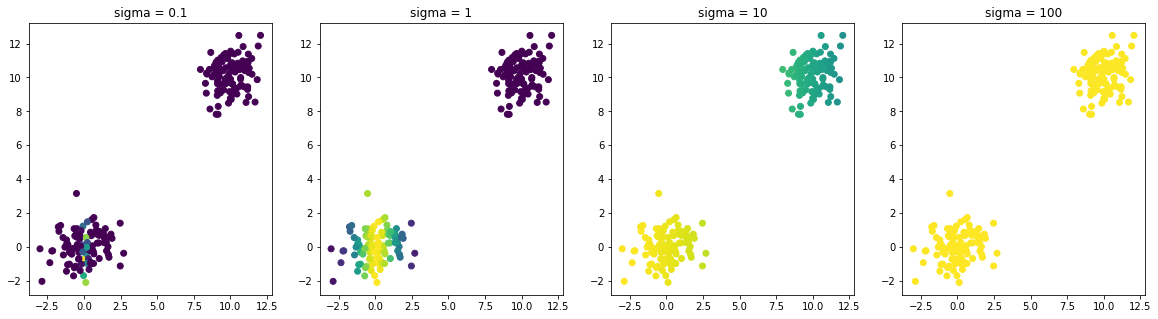

In [164]:
fig,ax = plt.subplots(1,4,figsize=(20,5))
sigs = [0.1,1,10,100]
for idx in range(len(sigs)):
    sigma = [sigs[idx] for i in range(200)]
    p_mat = matp(sigma = sigma)
    colorsp = p_mat[0,:]/p_mat[0:,].max()
    ax[idx].scatter(data.x,data.y,c=colorsp)
    ax[idx].set_title('sigma = '+str(sigs[idx]))
    

In [165]:
p_mat

array([[0.00000000e+00, 2.51894708e-05, 2.51772010e-05, ...,
        2.50413324e-05, 2.51007213e-05, 2.50535509e-05],
       [2.51894708e-05, 0.00000000e+00, 2.51775614e-05, ...,
        2.50376922e-05, 2.50984447e-05, 2.50501673e-05],
       [2.51772010e-05, 2.51775614e-05, 0.00000000e+00, ...,
        2.50738993e-05, 2.51204465e-05, 2.50837012e-05],
       ...,
       [2.50413324e-05, 2.50376922e-05, 2.50738993e-05, ...,
        0.00000000e+00, 2.51744357e-05, 2.52019583e-05],
       [2.51007213e-05, 2.50984447e-05, 2.51204465e-05, ...,
        2.51744357e-05, 0.00000000e+00, 2.51744348e-05],
       [2.50535509e-05, 2.50501673e-05, 2.50837012e-05, ...,
        2.52019583e-05, 2.51744348e-05, 0.00000000e+00]])

# (4) ${q}_{ij}$ matrix



In [143]:
def matq(dat=data.y,sigma=[1 for i in range(200)]):
    denom = 0
    for k in range(len(sigma)):
        for l in range(len(sigma)):
            if k != l:
                denom += 1 / (1 + abs(dat[k] - dat[l])**2 )

    matq = np.zeros((200,200))
    for i in range(200):
        for j in range(200):
            if j == i:
                matq[i,j] = 0
            else:
                num = 1 / (1 + abs(dat[i]-dat[j])**2 )
                matq[i,j] = num/denom
    return matq

In [117]:
q_mat = matq()

In [118]:
# sanity check, whole matrix sums to 1
print(q_mat.sum())

1.0000000000000002


# (5) plotting qij


Text(0.5, 1.0, 'sigma = 1, p_1j based')

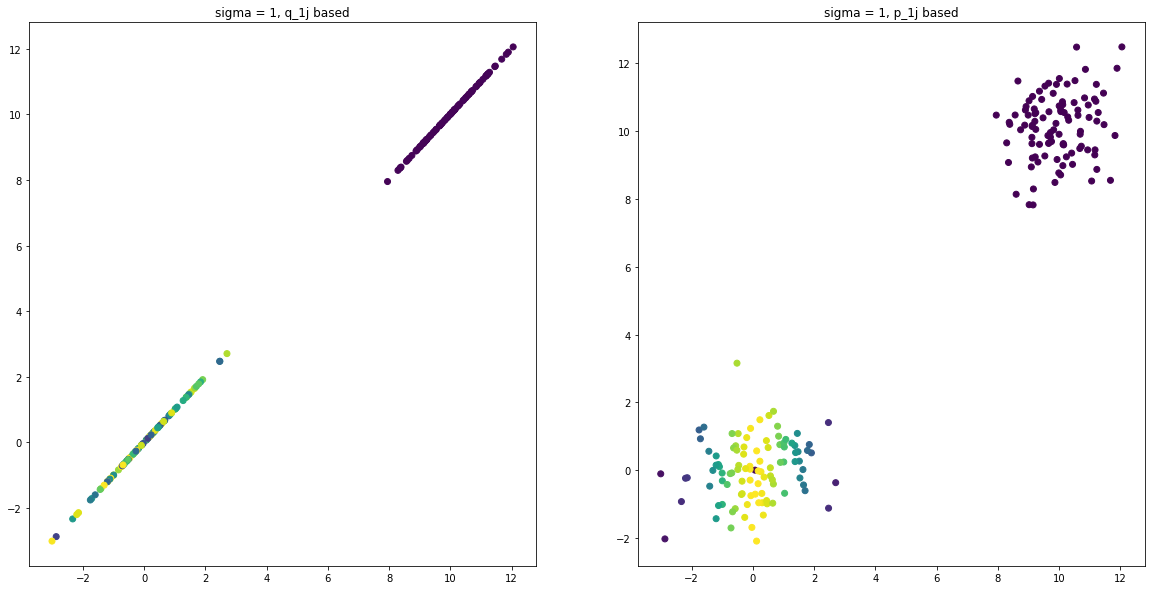

In [121]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
sigma = [1 for i in range(200)]
colorsq = q_mat[0,:]/q_mat[0:,].max()
ax[0].scatter(data.x,data.x,c=colorsq)
ax[0].set_title('sigma = 1, q_1j based')

ax[1].scatter(data.x,data.y,c=colorsp)
ax[1].set_title('sigma = 1, p_1j based')


# (6) KL Divergence 

In [151]:
def KLdiv(p_mat=p_mat,q_mat=q_mat,sigma=[1 for i in range(200)]):
    s = 0
    p_mat = matp(sigma = sigma)
    q_mat = matq(sigma = sigma)
    for i in range(200):
        for j in range(200):
            if i != j: #zero contribution when pij is 0, aka equal
                pij = p_mat[i,j]
                qij = q_mat[i,j]
                if pij != 0:
                    s += pij * np.log(pij / qij)
    return s


In [161]:
for sig in [0.1,1,100]:
    print('sig = '+str(sig)+' KLDiv: ',KLdiv(sigma = [sig for i in range(200)]))

sig = 0.1 KLDiv:  2.50620493212774
sig = 1 KLDiv:  0.41511419068251193
sig = 100 KLDiv:  1.4424362355637936


# (7) 